# Clustering of progressive passes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
from statsbombpy import sb
from mplsoccer.pitch import Pitch
from sklearn.cluster import KMeans
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

World Cup 2018

In [3]:
matches = sb.matches(43,3)

credentials were not supplied. open data access only


In [6]:
be = matches[(matches['home_team'] == 'Belgium') | (matches['away_team'] == 'Belgium')]

In [7]:
be

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
3,7536,2018-06-18,17:00:00.000,International - FIFA World Cup,2018,Belgium,Panama,3,0,available,scheduled,2021-12-06T22:40:10.487423,2021-06-13T16:17:31.694,1,Group Stage,Olimpiyskiy Stadion Fisht (Sochi),Janny Sikazwe,1.0.2,None,None
14,8650,2018-07-06,20:00:00.000,International - FIFA World Cup,2018,Brazil,Belgium,1,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,5,Quarter-finals,Kazan'' Arena (Kazan'),Milorad Mažić,1.0.2,None,None
29,7584,2018-07-02,20:00:00.000,International - FIFA World Cup,2018,Belgium,Japan,3,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,4,Round of 16,Rostov Arena,Malang Diedhiou,1.0.2,None,None
36,7552,2018-06-23,14:00:00.000,International - FIFA World Cup,2018,Belgium,Tunisia,5,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Group Stage,Otkrytiye Arena (Moskva),Jair Marrufo,1.0.2,None,None
50,7570,2018-06-28,20:00:00.000,International - FIFA World Cup,2018,England,Belgium,0,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,3,Group Stage,Stadion Kaliningrad,Damir Skomina,1.0.2,None,None
57,8655,2018-07-10,20:00:00.000,International - FIFA World Cup,2018,France,Belgium,1,0,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,6,Semi-finals,Saint-Petersburg Stadium,Andrés Cunha,1.0.2,None,None
58,8657,2018-07-14,16:00:00.000,International - FIFA World Cup,2018,Belgium,England,2,0,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,7,3rd Place Final,Saint-Petersburg Stadium,Alireza Faghani,1.0.2,None,None


# Brazil

In [8]:
bz = sb.events(8650)

credentials were not supplied. open data access only


In [10]:
bz.dtypes

ball_receipt_outcome              object
ball_recovery_recovery_failure    object
block_deflection                  object
carry_end_location                object
counterpress                      object
                                   ...  
tactics                           object
team                              object
timestamp                         object
type                              object
under_pressure                    object
Length: 74, dtype: object

In [13]:
for_clusters = ['team', 'type', 'location', 'pass_end_location']

In [15]:
bz = bz[for_clusters]

In [17]:
bz['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Dispossessed', 'Duel', 'Block', 'Ball Recovery',
       'Shot', 'Goal Keeper', 'Miscontrol', 'Dribble', 'Foul Committed',
       'Foul Won', 'Camera On', 'Clearance', 'Dribbled Past', 'Error',
       'Own Goal For', 'Own Goal Against', 'Camera off', 'Interception',
       'Player Off', 'Player On', 'Half End', 'Substitution',
       'Tactical Shift', 'Referee Ball-Drop', 'Injury Stoppage'],
      dtype=object)

In [18]:
bz_ = bz[bz['type'] == 'Pass']

In [21]:
def get_passes(df):
    df['x'] = [i[0] for i in df['location'].values]
    df['y'] = [i[1] for i in df['location'].values]
    df['endX'] = [i[0] for i in df['pass_end_location'].values]
    df['endY'] = [i[1] for i in df['pass_end_location'].values]
    df = df.drop(['location', 'pass_end_location'], axis =1)
    return df


In [22]:
bz_ = get_passes(bz_)

In [41]:
X = np.array(bz_[['x','y','endX', 'endY']])
kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(X)
bz_['cluster'] = kmeans.predict(X)

In [49]:
bz_['cluster'].value_counts()

6    115
3    112
8    109
9    109
1    101
7     99
2     97
4     82
5     72
0     21
Name: cluster, dtype: int64

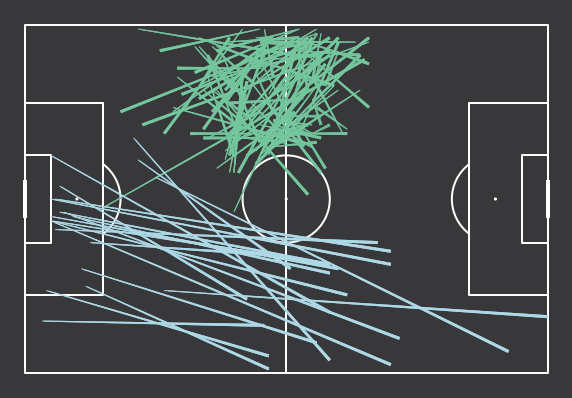

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(orientation='horizontal', pitch_color = '#38383b', line_color = 'white', figsize = (10,10),
             constrained_layout=False, tight_layout=True, view='full')

pitch.draw(ax=ax)

for row in range(len(bz_['cluster'])):
    
    if bz_['cluster'].values[row] == 8: #the location of passes from where Belgium made most of their passes
        pitch.lines(xstart=bz_['x'].values[row], ystart=bz_['y'].values[row], xend=bz_['endX'].values[row],
                yend=bz_['endY'].values[row],color='#74c69d', lw=3, zorder=2, comet=True, ax=ax)
        
    if bz_['cluster'].values[row] == 0: #the location of passes from where Belgium made least of their passes
        pitch.lines(xstart=bz_['x'].values[row], ystart=bz_['y'].values[row], xend=bz_['endX'].values[row],
                yend=bz_['endY'].values[row],color='#add8e6', lw=3, zorder=2, comet=True, ax=ax)

In [ ]:
bz_['Progressive'] = bz_[i for i ]